# Deep Learning - Yapay Sinir Ağları

Bugün insan beyninin öğrenme modelini taklit ederek öğrenen yapay sinir ağlarını derinlemesine öğreneceğiz

In [1]:
pip install tensorflow

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\ibrahim\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



## Classification

In [2]:
pip install --upgrade numpy pandas


  Using cached pandas-2.3.1-cp39-cp39-win_amd64.whl (11.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\ibrahim\\anaconda3\\Lib\\site-packages\\~-ndas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
!pip uninstall numpy pandas -y
!pip install numpy==1.24.4 pandas==1.5.3


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.3.1
Uninstalling pandas-2.3.1:
  Successfully uninstalled pandas-2.3.1
  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [4]:
import pandas as pd

In [5]:
!python --version


Python 3.9.13


In [99]:
# Classification

In [6]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [7]:
df.head()    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()    # Datadaki her şey rakam

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Pima kampında bulunan kızılderili kadınlara ait veriler Kaç kez hamile kaldı şekeri ne gibi outcome şeker hastası olup olmadığı

In [10]:
# Bir kişi şeker hastası mı değil mi sorusunun cevabı evet hayır olduğu için clustering örğeeni;

In [11]:
df.isnull().sum()    # Datada boş veri yok 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
x=df.drop('Outcome',axis=1)    # Outcome stününun silip x e eşitledik
y=df[['Outcome']]      # y ye de Outcome stünunu eşitledik

In [15]:
x.head()    # Outcome silindiğini ve x e eşitlendiğini görebiliriz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
df.columns    # Stün isimlerini görebiliriz

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [18]:
y=df[['Outcome']]    # Outcome hedef ve tahmin eidlecek veri olduğu için y ye eşitledik

In [19]:
# İki farklı şekilde x ve y yi belirledik 1. de drop ile yaptık 2. de stün isimlerini columns ile bulduk ve ayrı ayrı tanımladık

In [20]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [21]:
x=df.iloc[:,0:8]   # ilk 8 stünü seçer
y=df.iloc[:,8]    # 8 den sonraki stünları seçer
# Bu da x ve y yi belirlerken 3. yöntem

In [22]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
df.shape

(768, 9)

In [26]:
model=Sequential()   
model.add(Dense(80,activation='relu'))     #İlk 120 neronu bağlamış olduk,, relu veri önemliyse 1 in üstnde geliyor önemsizse es geçiyor
model.add(Dense(120,activation='relu'))     # 2. layerı oluşturuyoruz
model.add(Dense(64,activation='relu'))     # 3. layerı oluşturduk
model.add(Dense(30,activation='relu'))      # 4. layerı oluşturduk
model.add(Dense(4,activation='relu'))       # 5. layerı oluşturduk
model.add(Dense(1,activation='sigmoid'))    # Son layerı oluşturduk Classifaction da sonuç evet veya hayır olacağı için sigmoid kullandık
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
# Rakamlar tamamen hayal ürünü
# Fakat giriş kısımında ki 120 yerine x de kaç tane stün varsa o kadarla girmek tercih ediliyor ideal olan bu
# Sonuç 1 veya 0 olacaksa son layerda 1 e inmemiz lazım ve sigmoid kullanmamız lazım 
# Cevapta evet hayır varsa binary_corressentropy seçiyoruz
# adams ile optimum noktaya gelirken küçük adımlar kullanıyor akıllı hareket ediyor
# relu aktivasyon fonksiyonu veri önemliyse bir sonrakine aktarmayı sağlıyor

In [28]:
history=model.fit(x,y, epochs=250,batch_size=32,validation_split=0.1,verbose=1)   # Verbose 0 dersek aşağıdaki sonucu göstermez

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4894 - loss: 1.5594 - val_accuracy: 0.5974 - val_loss: 0.6499
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6418 - loss: 0.6255 - val_accuracy: 0.5844 - val_loss: 0.6744
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6545 - loss: 0.6104 - val_accuracy: 0.5714 - val_loss: 0.6560
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6443 - loss: 0.6146 - val_accuracy: 0.5974 - val_loss: 0.6559
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6719 - loss: 0.6122 - val_accuracy: 0.5974 - val_loss: 0.6736
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6595 - loss: 0.5734 - val_accuracy: 0.5974 - val_loss: 0.6668
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6550 - loss: 0.5873 - val_accuracy: 0.5974 - val_loss: 0.6579
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6573 - loss: 0.5867 - val_accuracy: 0.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6969 - loss: 0.5319 - val_accuracy: 0.6494 - val_loss: 0.6415
Epoch 52/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.4907 - val_accuracy: 0.6883 - val_loss: 0.6324
Epoch 53/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7138 - loss: 0.5326 - val_accuracy: 0.7013 - val_loss: 0.6294
Epoch 54/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7315 - loss: 0.5166 - val_accuracy: 0.6883 - val_loss: 0.6480
Epoch 55/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7200 - loss: 0.5095 - val_accuracy: 0.6883 - val_loss: 0.6511
Epoch 56/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7333 - loss: 0.5019 - val_accuracy: 0.6623 - val_loss: 0.6395
Epoch 57/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7617 - loss: 0.5048 - val_accuracy: 0.7013 - val_loss: 0.6446
Epoch 58/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7122 - loss: 0.5258 - val_accuracy: 0.6623 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7297 - loss: 0.4583 - val_accuracy: 0.6753 - val_loss: 0.6139
Epoch 102/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7287 - loss: 0.4654 - val_accuracy: 0.6883 - val_loss: 0.6274
Epoch 103/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7229 - loss: 0.4874 - val_accuracy: 0.6753 - val_loss: 0.7038
Epoch 104/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7224 - loss: 0.4553 - val_accuracy: 0.6753 - val_loss: 0.6478
Epoch 105/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7139 - loss: 0.4532 - val_accuracy: 0.6623 - val_loss: 0.6289
Epoch 106/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6935 - loss: 0.4649 - val_accuracy: 0.7013 - val_loss: 0.7024
Epoch 107/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7209 - loss: 0.4585 - val_accuracy: 0.6753 - val_loss: 0.6493
Epoch 108/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.4403 - val_accuracy: 0

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8075 - loss: 0.3709 - val_accuracy: 0.7273 - val_loss: 0.6476
Epoch 152/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8046 - loss: 0.3833 - val_accuracy: 0.7143 - val_loss: 0.6851
Epoch 153/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8299 - loss: 0.3467 - val_accuracy: 0.7532 - val_loss: 0.6236
Epoch 154/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8247 - loss: 0.3787 - val_accuracy: 0.7273 - val_loss: 0.6103
Epoch 155/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7946 - loss: 0.3924 - val_accuracy: 0.7143 - val_loss: 0.7178
Epoch 156/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7895 - loss: 0.4287 - val_accuracy: 0.7273 - val_loss: 0.6192
Epoch 157/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8236 - loss: 0.3751 - val_accuracy: 0.7532 - val_loss: 0.6379
Epoch 158/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8315 - loss: 0.3613 - val_accuracy: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8562 - loss: 0.2821 - val_accuracy: 0.7013 - val_loss: 0.7435
Epoch 202/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8470 - loss: 0.3180 - val_accuracy: 0.7403 - val_loss: 0.6225
Epoch 203/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8305 - loss: 0.3349 - val_accuracy: 0.7662 - val_loss: 0.6099
Epoch 204/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8807 - loss: 0.2983 - val_accuracy: 0.7662 - val_loss: 0.6745
Epoch 205/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8845 - loss: 0.2348 - val_accuracy: 0.7532 - val_loss: 0.6694
Epoch 206/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8837 - loss: 0.2503 - val_accuracy: 0.7273 - val_loss: 0.6938
Epoch 207/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8751 - loss: 0.2485 - val_accuracy: 0.7532 - val_loss: 0.6967
Epoch 208/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8689 - loss: 0.2511 - val_accuracy: 

In [29]:
# Train test split yerine validation_split=0.1 dediğimizde bu işlem yüzde 10 unu eğitmek ve test etmek için ayırıyor
# epochs sokaklar arasında yani layerlar arasında kaç defa gidip gelmemiz gerektiğini söylüyor
# Accuracy oranına bakarak epoch kaç kez olması gerektiğne karar veriyoruz
# histroy = diyerek modeli hafızaya kaydedecek
# modeli sürekli eğiterek başarı artıyor 1 çıkarsa iyi değil
# batch size ile datayı 32 ye bölüp yani 32 farklı kamyonla taşıyoruz bu şekilde çok ram yiyen data daha rahat çözülebiliyor
#verbose ise aşağıdaki rakamların gözüküp gözükmeyeceğini sağlıyor

In [30]:
history.history['accuracy']

[0.5918958187103271,
 0.6613603234291077,
 0.6628075242042542,
 0.6512300968170166,
 0.6570188403129578,
 0.6570188403129578,
 0.659913182258606,
 0.6613603234291077,
 0.6642547249794006,
 0.6642547249794006,
 0.670043408870697,
 0.6729377508163452,
 0.670043408870697,
 0.670043408870697,
 0.6685962080955505,
 0.6874095797538757,
 0.6657018661499023,
 0.6743849515914917,
 0.6888567209243774,
 0.6975398063659668,
 0.6874095797538757,
 0.6989869475364685,
 0.6903039216995239,
 0.6960926055908203,
 0.6917510628700256,
 0.7033284902572632,
 0.700434148311615,
 0.7047756910324097,
 0.6801736354827881,
 0.6888567209243774,
 0.6931982636451721,
 0.6917510628700256,
 0.700434148311615,
 0.7047756910324097,
 0.6975398063659668,
 0.6989869475364685,
 0.7076700329780579,
 0.6874095797538757,
 0.700434148311615,
 0.6989869475364685,
 0.6989869475364685,
 0.6989869475364685,
 0.7149059176445007,
 0.7018813490867615,
 0.7047756910324097,
 0.7062228918075562,
 0.7062228918075562,
 0.6946454644203186,

In [31]:
# Kural:Datayı derin öğrenmeden önce Normalize etmemiz gerekiyor Bunun için tekrardan bir python açıp NormalizationPCA açtık ve burda hazırlık yapacağız

In [32]:
from sklearn.preprocessing import normalize,scale

In [33]:
x=scale(x)   # x in yeni değeri scale edilmiş haline çevirdik

In [34]:
history=model.fit(x,y, epochs=250,batch_size=32,validation_split=0.1,verbose=1) 

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6647 - loss: 1.7959 - val_accuracy: 0.5714 - val_loss: 0.6921
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6688 - loss: 0.6171 - val_accuracy: 0.5844 - val_loss: 0.6605
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7004 - loss: 0.5696 - val_accuracy: 0.6104 - val_loss: 0.6386
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7356 - loss: 0.4978 - val_accuracy: 0.7143 - val_loss: 0.5715
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7561 - loss: 0.4722 - val_accuracy: 0.8052 - val_loss: 0.5228
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7955 - loss: 0.4114 - val_accuracy: 0.7922 - val_loss: 0.5250
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7760 - loss: 0.4439 - val_accuracy: 0.7662 - val_loss: 0.5557
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8090 - loss: 0.3968 - val_accuracy: 0.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9414 - loss: 0.1735 - val_accuracy: 0.7792 - val_loss: 0.8702
Epoch 52/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9387 - loss: 0.1852 - val_accuracy: 0.7662 - val_loss: 0.9300
Epoch 53/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9194 - loss: 0.2022 - val_accuracy: 0.7532 - val_loss: 0.9042
Epoch 54/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9269 - loss: 0.2039 - val_accuracy: 0.7403 - val_loss: 0.9034
Epoch 55/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9445 - loss: 0.1592 - val_accuracy: 0.7532 - val_loss: 0.9170
Epoch 56/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9264 - loss: 0.1797 - val_accuracy: 0.7273 - val_loss: 0.9772
Epoch 57/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9316 - loss: 0.1815 - val_accuracy: 0.7662 - val_loss: 0.9139
Epoch 58/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9285 - loss: 0.1763 - val_accuracy: 0.7403 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9875 - loss: 0.0445 - val_accuracy: 0.7532 - val_loss: 1.4278
Epoch 102/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9710 - loss: 0.0692 - val_accuracy: 0.7532 - val_loss: 1.3740
Epoch 103/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9628 - loss: 0.0819 - val_accuracy: 0.7403 - val_loss: 1.4471
Epoch 104/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9753 - loss: 0.0663 - val_accuracy: 0.7662 - val_loss: 1.4344
Epoch 105/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9878 - loss: 0.0410 - val_accuracy: 0.7792 - val_loss: 1.4194
Epoch 106/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9728 - loss: 0.0534 - val_accuracy: 0.7532 - val_loss: 1.4788
Epoch 107/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9708 - loss: 0.0690 - val_accuracy: 0.7792 - val_loss: 1.4561
Epoch 108/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9789 - loss: 0.0533 - val_accuracy: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9956 - loss: 0.0173 - val_accuracy: 0.7792 - val_loss: 1.7722
Epoch 152/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.7922 - val_loss: 1.7905
Epoch 153/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9944 - loss: 0.0136 - val_accuracy: 0.7662 - val_loss: 1.8158
Epoch 154/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9945 - loss: 0.0137 - val_accuracy: 0.7662 - val_loss: 1.8429
Epoch 155/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9963 - loss: 0.0138 - val_accuracy: 0.7792 - val_loss: 1.8180
Epoch 156/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.7662 - val_loss: 1.8493
Epoch 157/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9965 - loss: 0.0122 - val_accuracy: 0.7792 - val_loss: 1.8398
Epoch 158/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.7662 - val_loss: 2.2677
Epoch 202/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.7922 - val_loss: 2.2556
Epoch 203/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.7662 - val_loss: 2.3016
Epoch 204/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9974 - loss: 0.0052 - val_accuracy: 0.7662 - val_loss: 2.3305
Epoch 205/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.7792 - val_loss: 2.2722
Epoch 206/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.7662 - val_loss: 2.2821
Epoch 207/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.7792 - val_loss: 2.2909
Epoch 208/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 

In [35]:
import matplotlib.pyplot as plt

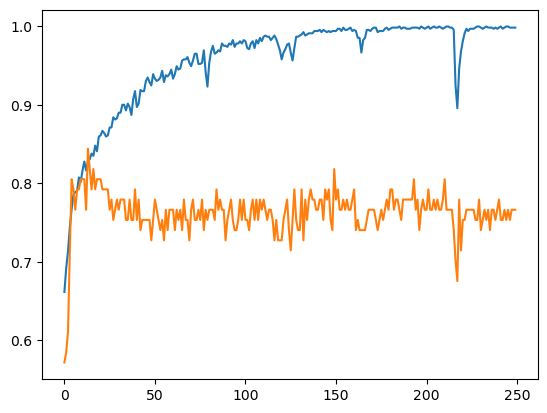

In [36]:
plt.plot(history.history['accuracy'])    # accuracy nin grafikte ki değişimi
plt.plot(history.history['val_accuracy'])  

In [37]:
# Derin öğrenme için datanın en az 1000 satır olması gerekiyor

In [38]:
# Regression

In [39]:
df=pd.read_pickle('kc_house.pkl')

In [40]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x=df.drop('price',axis=1)
y=df[['price']]

In [63]:
x=scale(x)

In [64]:
model=Sequential()   
model.add(Dense(120,activation='relu'))     #İlk 120 neronu bağlamış olduk,, relu veri önemliyse 1 in üstnde geliyor önemsizse es geçiyor
model.add(Dense(80,activation='relu'))     # 2. layerı oluşturuyoruz
model.add(Dense(64,activation='relu'))     # 3. layerı oluşturduk
model.add(Dense(30,activation='relu'))      # 4. layerı oluşturduk
model.add(Dense(4,activation='relu'))       # 5. layerı oluşturduk
model.add(Dense(1))    # Son layerı oluşturduk Classifaction da sonuç evet veya hayır olacağı için sigmoid kullandık fakat burda fiyat tahmin ettiğimiz için sigmoidi sildik
model.compile(loss='mse',optimizer='adam')   # Regression loss mse mean square error
#son dense 1 kısmında kaç farklı sınıf varsa onu yazıyoruz mesela 4 farklı sınıf var kuş kedi köpek balık 4 yazıyoruz

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
history=model.fit(x_train,y_train, epochs=250,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 277022441472.0000 - val_loss: 271207088128.0000
Epoch 2/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 220487565312.0000 - val_loss: 24521412608.0000
Epoch 3/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16476502016.0000 - val_loss: 10333222912.0000
Epoch 4/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9273206784.0000 - val_loss: 9512604672.0000
Epoch 5/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9053652992.0000 - val_loss: 9117257728.0000
Epoch 6/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8461303296.0000 - val_loss: 8872040448.0000
Epoch 7/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8068302336.0000 - val_loss: 8690065408.0000
Epoch 8/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8079002624.0000 - val_loss: 8575691776.0000
Epoch 9/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7863580160.0000 - val_loss: 8459908096.0000
Epoch 10/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6467315200.0000 - val_loss: 7749685760.0000
Epoch 60/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6794645504.0000 - val_loss: 7764935168.0000
Epoch 61/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6532767232.0000 - val_loss: 7743867392.0000
Epoch 62/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6443876864.0000 - val_loss: 7746059264.0000
Epoch 63/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6670931968.0000 - val_loss: 7728181760.0000
Epoch 64/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6428275200.0000 - val_loss: 7786618368.0000
Epoch 65/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6538220032.0000 - val_loss: 7775373824.0000
Epoch 66/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6543542272.0000 - val_loss: 7718986240.0000
Epoch 67/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6764184064.0000 - val_loss: 7741304832.0000
Epoch 68/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6432861696.0000 - val_loss: 7712838144.0000
Epoch 118/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6425787392.0000 - val_loss: 7663659008.0000
Epoch 119/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6038638592.0000 - val_loss: 7647126528.0000
Epoch 120/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6194620928.0000 - val_loss: 7623887360.0000
Epoch 121/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6190056448.0000 - val_loss: 7630130176.0000
Epoch 122/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6119162368.0000 - val_loss: 7614865920.0000
Epoch 123/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6127606272.0000 - val_loss: 7612583424.0000
Epoch 124/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6242450944.0000 - val_loss: 7631390208.0000
Epoch 125/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6259295232.0000 - val_loss: 7668243968.0000
Epoch 126/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5816420864.0000 - val_loss: 7622529536.0000
Epoch 176/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5780318720.0000 - val_loss: 7640474112.0000
Epoch 177/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5849712128.0000 - val_loss: 7616321024.0000
Epoch 178/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5950619136.0000 - val_loss: 7646310912.0000
Epoch 179/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5711583232.0000 - val_loss: 7669800960.0000
Epoch 180/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6014308864.0000 - val_loss: 7707464192.0000
Epoch 181/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5769511936.0000 - val_loss: 7638218240.0000
Epoch 182/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5967886848.0000 - val_loss: 7711321600.0000
Epoch 183/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5831160832.0000 - val_loss: 7667295744.0000
Epoch 184/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/s

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5660843520.0000 - val_loss: 7702900224.0000
Epoch 234/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5709078016.0000 - val_loss: 7657349632.0000
Epoch 235/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5576196096.0000 - val_loss: 7663591424.0000
Epoch 236/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5785658880.0000 - val_loss: 7640796672.0000
Epoch 237/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5746261504.0000 - val_loss: 7670213120.0000
Epoch 238/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5600944128.0000 - val_loss: 7688770560.0000
Epoch 239/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5496949248.0000 - val_loss: 7650473984.0000
Epoch 240/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5656039424.0000 - val_loss: 7665453056.0000
Epoch 241/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5587686400.0000 - val_loss: 7657661440.0000
Epoch 242/250
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

In [68]:
tahmin=model.predict(x_test)    # test dosyasından yeni değerleri tahmin ettiriyoruz

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
r2_score(y_test,tahmin)

0.8507851329718039

In [71]:
mean_squared_error(y_test,tahmin)**.5

87398.02037640395

In [72]:
# çok hatalı çıktı burda nöron sayılarını değiştirebiiriz veya epoch değerini arttırabiliriz regressionda sigmoid olmayacak

In [73]:
# ollama.com dan setup ettik
# Sonra ollama sitesinde aradığımız dil modelini yazıp kodu kopyalayıp terminalde bu kodu yazdığımızda offline şekilde bu dil modelini kullanabiliriz
# ollama run llama3.2-vision:11b-instruct-q8_0  bunu kurduk ve deepsek  ollama run deepseek-r1 bunu kurduk

In [74]:
df=pd.read_excel('cars.xls')

In [75]:
x=df.drop('Price',axis=True)
y=df[['Price']]

In [76]:
x=pd.get_dummies(x,drop_first=True)  # Yazı olan stünları rakama çeviriyorz

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
x=StandardScaler().fit_transform(x)

In [79]:
model=Sequential()   
model.add(Dense(64,activation='relu'))     #İlk 120 neronu bağlamış olduk,, relu veri önemliyse 1 in üstnde geliyor önemsizse es geçiyor
model.add(Dense(128,activation='relu'))     # 2. layerı oluşturuyoruz
model.add(Dense(256,activation='relu'))     # 3. layerı oluşturduk
model.add(Dense(64,activation='relu'))      # 4. layerı oluşturduk
model.add(Dense(32,activation='relu'))       # 5. layerı oluşturduk
model.add(Dense(1))    # Son layerı oluşturduk Classifaction da sonuç evet veya hayır olacağı için sigmoid kullandık fakat burda fiyat tahmin ettiğimiz için sigmoidi sildik
model.compile(loss='mse',optimizer='adam')

In [80]:
# Early Stoping  = En optimum epocu bulmaya yarar

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)   # 10 a kadar sabret sonra early stopping çalıştır

In [94]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=32,callbacks=[early_stop],verbose=1)
# early stop ile 3 te durdu bu 30 la 3 arasında bir fark yok demek epochs için en optimumu bulunca duruyor

Epoch 1/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7042609664.0000 - val_loss: 8063011328.0000
Epoch 2/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7178664960.0000 - val_loss: 8181268480.0000
Epoch 3/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7056420352.0000 - val_loss: 7988701696.0000
Epoch 4/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6807123456.0000 - val_loss: 7972537344.0000
Epoch 5/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7205625856.0000 - val_loss: 8798734336.0000
Epoch 6/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6797082112.0000 - val_loss: 8041080320.0000
Epoch 7/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7037370368.0000 - val_loss: 7867946496.0000
Epoch 8/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6595655168.0000 - val_loss: 8083630592.0000
Epoch 9/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7073758720.0000 - val_loss: 7863197696.0000
Epoch 10/30
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 666

In [95]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
r2_score(tahmin,y_test)

0.8183404317720572

In [97]:
# Başarı oranını arttırmak için layer sayını değiştirebiliriz veya araya layer ekleyebiiriz.

In [98]:
# Deeplearning de keras ve pytorch var keras çok kısa fakat pytorch daha uzun kod yazmamız gerekiyor.